In [2]:
import numpy as np
import matplotlib.pyplot as plt

<center>

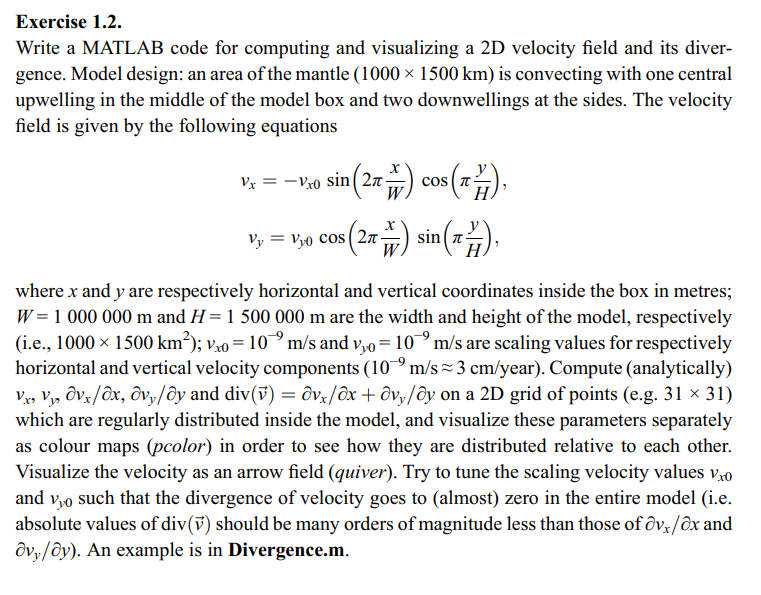

</center>

In [3]:
# area of the mantle section
x_size = 1000000       # in meters
y_size = 1500000       # in meters  (americans have no idea what Im talking about...)
mantle_area = x_size * y_size
mantle_area

1500000000000

In [4]:
V_x0 = 1e-9
V_y0 = 1e-9

In [5]:
#resolution (nodal points)
n = 31  #sj
x_step = x_size / (n - 1)
y_step = y_size / (n - 1)
print(x_step)
print(y_step)

33333.333333333336
50000.0


In [6]:
#creating the vector fields
x = np.linspace(0, x_size, n)
y = np.linspace(0, y_size, n)

In [7]:
#creating the velocity arrays
V_x = np.zeros((n, n))
V_y = np.zeros((n, n))
dV_xdx = np.zeros((n, n))
dV_ydy = np.zeros((n, n))
divv = np.zeros((n, n))

In [8]:
for i in range(n):
    for j in range(n):
        V_x[i, j] = -V_x0 * np.sin(2 * np.pi * x[j] / x_size) * np.cos(np.pi * y[i] / y_size)
        V_y[i, j] = V_y0 * np.cos(2 * np.pi * x[j] / x_size) * np.sin(np.pi * y[i] / y_size)

the partial derivatives here are analytically calculated, but it can be done numerically using python as well.

In [9]:
for i in range(n):
    for j in range(n):
        dV_xdx[i, j] = -V_x0 * 2 * np.pi / x_size * np.cos(2 * np.pi * x[j] / x_size) * np.cos(np.pi * y[i] / y_size)
        dV_ydy[i, j] = V_y0 * np.pi / y_size * np.cos(np.pi * y[i] / y_size) * np.cos(2 * np.pi * x[j] / x_size)
        divv[i, j] = dV_xdx[i, j] + dV_ydy[i, j]

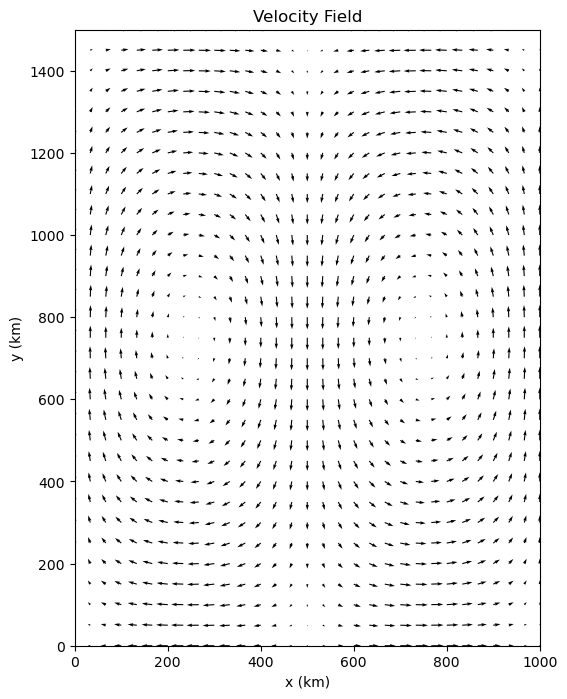

In [47]:
# plotting the velocity field
plt.figure(figsize=(6, 8))
plt.quiver(x / 1000, y / 1000, V_x, V_y)
plt.title('Velocity Field')
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.axis([0, x_size / 1000, 0, y_size / 1000])
plt.show()

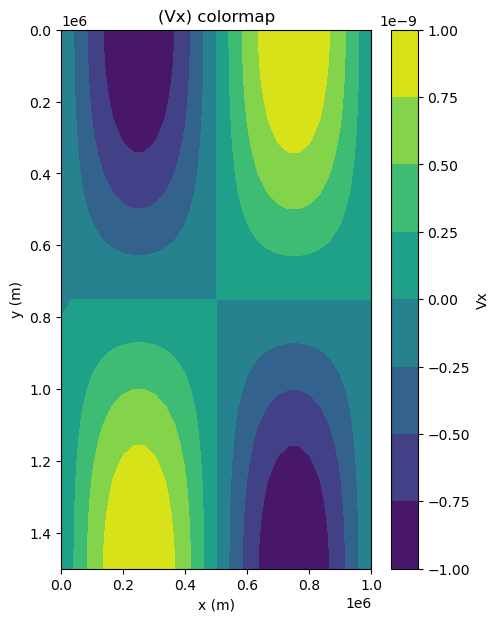

In [10]:
# Plotting
plt.figure(figsize=(5, 7))
plt.contourf(x, y, V_x, cmap='viridis')
plt.colorbar(label='Vx')
plt.title('(Vx) colormap')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.gca().invert_yaxis()  # to make it look like the ones made with matlab (for comparison)
plt.show()

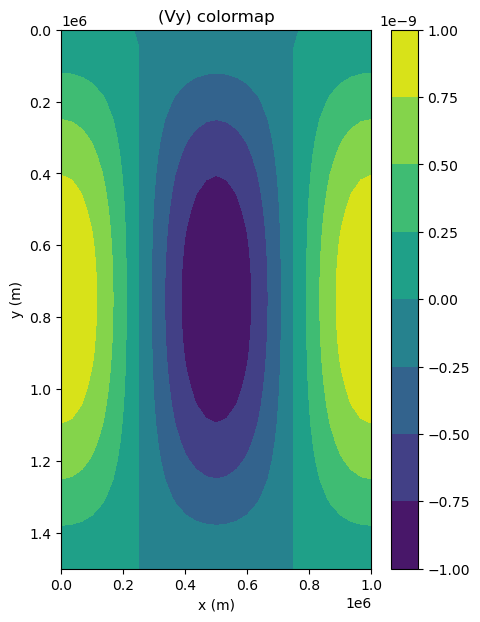

In [11]:
# Plotting
plt.figure(figsize=(5, 7))
plt.contourf(x, y, V_y, cmap='viridis')
plt.colorbar()
plt.title('(Vy) colormap')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.gca().invert_yaxis()
plt.show()

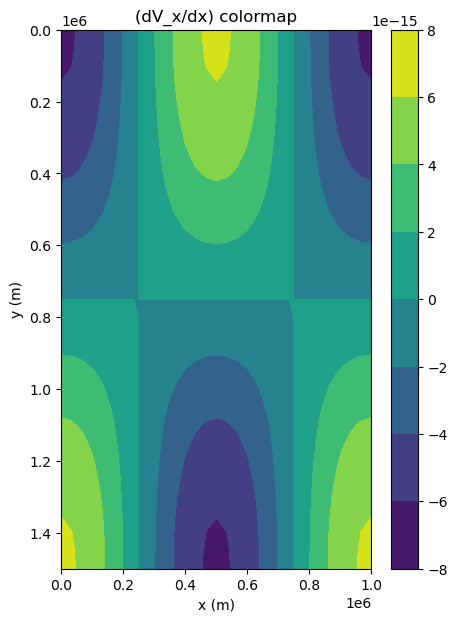

In [14]:
# Plotting
plt.figure(figsize=(5, 7))
plt.contourf(x, y, dV_xdx, cmap='viridis')
plt.colorbar()
plt.title('(dV_x/dx) colormap')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.gca().invert_yaxis()
plt.show()

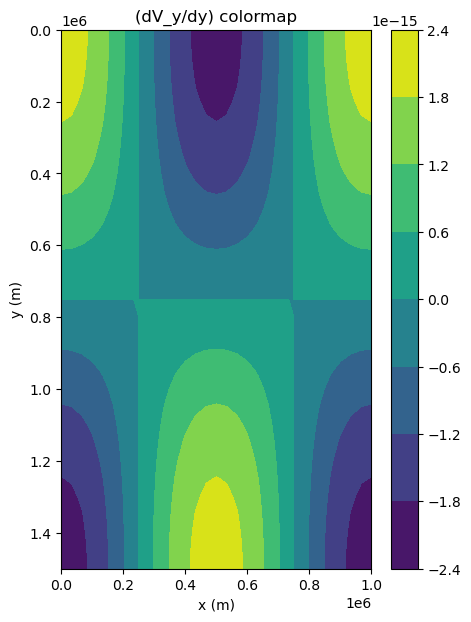

In [16]:
# Plotting
plt.figure(figsize=(5, 7))
plt.contourf(x, y, dV_ydy, cmap='viridis')
plt.colorbar()
plt.title('(dV_y/dy) colormap')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.gca().invert_yaxis()
plt.show()

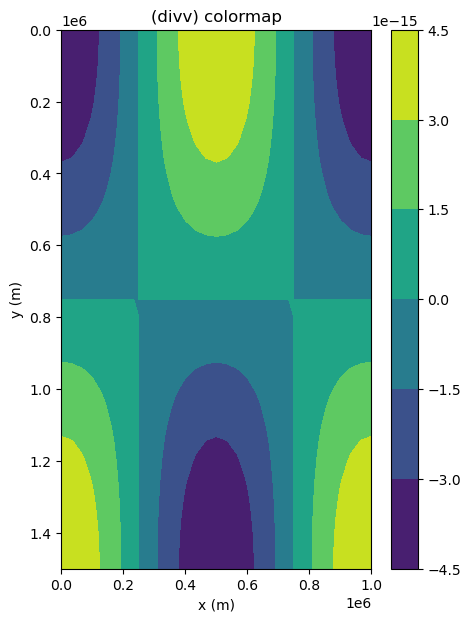

In [18]:
# Plotting
plt.figure(figsize=(5, 7))
plt.contourf(x, y, divv, cmap='viridis')
plt.colorbar()
plt.title('(divv) colormap')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.gca().invert_yaxis()
plt.show()